In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("state_data.csv")

# Print the shape
print("Shape of the dataset:", df.shape)
# Show first and last five rows
display(df.head())
display(df.tail())
median_lat = df["latitude"].median()
median_lon = df["longitude"].median()

print(f"Median latitude: {median_lat:.2f}")
print(f"Median longitude: {median_lon:.2f}")
df["lat_distance"] = abs(df["latitude"] - median_lat)
df["lon_distance"] = abs(df["longitude"] - median_lon)

print("New shape:", df.shape)
closest_lat = df.loc[df["lat_distance"].idxmin()]
farthest_lat = df.loc[df["lat_distance"].idxmax()]

closest_lon = df.loc[df["lon_distance"].idxmin()]
farthest_lon = df.loc[df["lon_distance"].idxmax()]

print(f"Closest to median latitude: {closest_lat['state']} ({closest_lat['lat_distance']:.2f}°)")
print(f"Farthest from median latitude: {farthest_lat['state']} ({farthest_lat['lat_distance']:.2f}°)")
print(f"Closest to median longitude: {closest_lon['state']} ({closest_lon['lon_distance']:.2f}°)")
print(f"Farthest from median longitude: {farthest_lon['state']} ({farthest_lon['lon_distance']:.2f}°)")

# new pandas function
melted = df.melt(id_vars=["state"], 
                 value_vars=["latitude", "longitude"],
                 var_name="coord_type",
                 value_name="degrees")

# Show the first few rows of the melted DataFrame
display(melted.head(10))
# Where I found it: melt() is documented in the pandas official documentation under "Reshaping by melting" (Pandas API Reference → DataFrame.melt).
# What the function does: melt() converts a DataFrame from wide format to long format by collapsing one or more columns into key/value pairs. In the example above it turns the latitude and longitude columns into rows with a coord_type column telling you which coordinate it is and a degrees column with the numeric value.
#When it’s helpful: Use melt() when you want to plot or analyze measurements of the same kind that are currently stored in separate columns. It’s also useful for joining with other long-format datasets or for aggregation across the melted variable.


Shape of the dataset: (52, 4)


,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


,state,latitude,longitude,name
47,VT,44.558803,-72.577841,Vermont
48,WA,47.751074,-120.740139,Washington
49,WI,43.784440,-88.787868,Wisconsin
50,WV,38.597626,-80.454903,West Virginia
51,WY,43.075968,-107.290284,Wyoming


Median latitude: 39.44
Median longitude: -89.09
New shape: (52, 6)
Closest to median latitude: CO (0.11°)
Farthest from median latitude: AK (24.15°)
Closest to median longitude: IL (0.31°)
Farthest from median longitude: HI (66.57°)


,state,coord_type,degrees
0,AK,latitude,63.588753
1,AL,latitude,32.318231
2,AR,latitude,35.201050
3,AZ,latitude,34.048928
4,CA,latitude,36.778261
5,CO,latitude,39.550051
6,CT,latitude,41.603221
7,DC,latitude,38.905985
8,DE,latitude,38.910832
9,FL,latitude,27.664827


In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
print("Shape:", penguins.shape)
display(penguins.head())
display(penguins.tail())


Shape: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


/var/folders/f9/j52tqh7s44b6t46p44w7651h0000gn/T/ipykernel_57684/3910906281.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins, x="species", y="body_mass_g", palette="viridis", ax=axs[1,1])


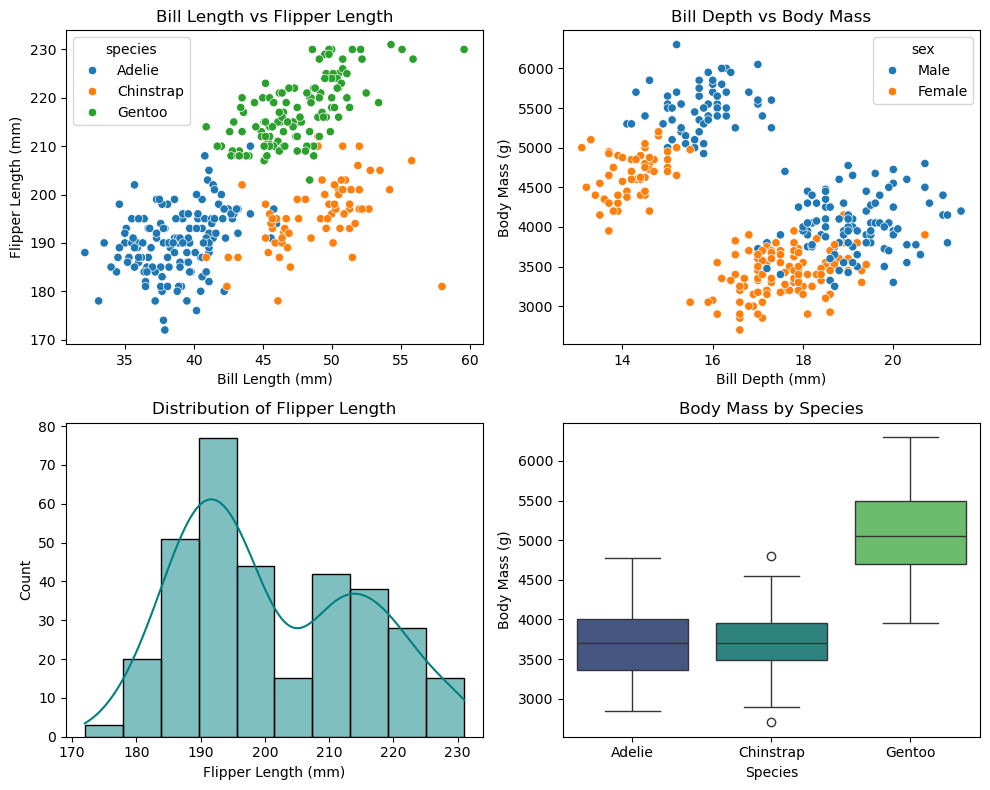

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top left
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", ax=axs[0,0])
axs[0,0].set_title("Bill Length vs Flipper Length")
axs[0,0].set_xlabel("Bill Length (mm)")
axs[0,0].set_ylabel("Flipper Length (mm)")

# Top right
sns.scatterplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="sex", ax=axs[0,1])
axs[0,1].set_title("Bill Depth vs Body Mass")
axs[0,1].set_xlabel("Bill Depth (mm)")
axs[0,1].set_ylabel("Body Mass (g)")

# Bottom left
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, color="teal", ax=axs[1,0])
axs[1,0].set_title("Distribution of Flipper Length")
axs[1,0].set_xlabel("Flipper Length (mm)")
axs[1,0].set_ylabel("Count")

# Bottom right
sns.boxplot(data=penguins, x="species", y="body_mass_g", palette="viridis", ax=axs[1,1])
axs[1,1].set_title("Body Mass by Species")
axs[1,1].set_xlabel("Species")
axs[1,1].set_ylabel("Body Mass (g)")

plt.tight_layout()
plt.show()


In [ ]:
# Top left: How flipper length correlates with bill length — each species clusters separately.
# Top right: Males generally weigh more.
# Bottom left: Most flippers ~190–210 mm.
# Bottom right: Gentoo penguins weigh the most.
# what I learned from each data set:
# Top left: This scatterplot shows how penguin species differ in body proportions. Gentoo penguins have both longer bills and flippers, while Adelie penguins are smaller in both dimensions. This suggests a possible link between species type and size adaptations to their habitats.
# Top right: This plot compares bill depth to body mass, colored by sex. Males generally appear heavier than females across all species, showing mild sexual dimorphism in penguin body size.
# Bottom left: The histogram shows that most penguins have flipper lengths around 190–210 mm, with Gentoo penguins skewing toward longer flippers. The distribution is fairly tight, suggesting flipper size is a stable physical trait within species.
# Bottom right: The boxplot reveals that Gentoo penguins are consistently the heaviest, Chinstrap are moderate, and Adelie are the lightest. This difference could relate to diet or environment. Gentoo penguins tend to live in less icy habitats with more food availability.